## Observations and Insights 

Write at least 3 observations or inferences based on the data.

1. Minimal outliers.

In [1]:
%matplotlib notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [3]:
#Check which variable to use as merging id
mouse_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Mouse ID      249 non-null    object
 1   Drug Regimen  249 non-null    object
 2   Sex           249 non-null    object
 3   Age_months    249 non-null    int64 
 4   Weight (g)    249 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 9.9+ KB


In [4]:
#Check which variable to use as merging id
study_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Mouse ID             1893 non-null   object 
 1   Timepoint            1893 non-null   int64  
 2   Tumour Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites     1893 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 59.3+ KB


In [5]:
# Combine the data into a single dataset

mouse_data_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID"])

# Preview first 5 rows of the dataframe to check success of merge

mouse_data_complete.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
mouse_data_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Mouse ID             1893 non-null   object 
 1   Drug Regimen         1893 non-null   object 
 2   Sex                  1893 non-null   object 
 3   Age_months           1893 non-null   int64  
 4   Weight (g)           1893 non-null   int64  
 5   Timepoint            1893 non-null   int64  
 6   Tumour Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites     1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [7]:
# Code below returns all Mouse IDs including repeats/duplicates
count_mice = mouse_data_complete["Mouse ID"].value_counts().sum()
count_mice

1893

In [8]:
# Code below produces count of unique IDs to obtain exact number of mice.
unique_mice = mouse_data_complete["Mouse ID"].nunique()
unique_mice

249

In [9]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# Check how many duplicated mice are in the dataframe
duplicate_mice_count = len(mouse_data_complete[mouse_data_complete.duplicated(['Mouse ID','Timepoint'])])
duplicate_mice_count

5

In [10]:
duplicate_mice_find = mouse_data_complete.loc[mouse_data_complete.duplicated(['Mouse ID','Timepoint'])]
duplicate_mice_find

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [11]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mice = mouse_data_complete[mouse_data_complete.duplicated(['Mouse ID','Timepoint'])]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [12]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

mouse_data_clean = mouse_data_complete.drop_duplicates(subset=['Mouse ID','Timepoint'],keep='first')
mouse_data_clean

# 5 duplicate rows dropped

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [13]:
#Check if there are any duplicates left
duplicate_mice_count2 = len(mouse_data_clean[mouse_data_clean.duplicated(['Mouse ID','Timepoint'])])
duplicate_mice_count2

0

In [14]:
# Checking the number of mice in the clean DataFrame.
unique_mice_clean = mouse_data_clean["Mouse ID"].nunique()
unique_mice_clean

##Number of mice remain the same after checking unique id.

249

## Summary Statistics

Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

Use groupby and summary statistical methods to calculate the following properties of each drug regimen: mean, median, variance, standard deviation, and SEM of the tumour volume. 

Assemble the resulting series into a single summary dataframe.

working dataframe: mouse_data_clean

In [15]:
# Examine the different types of drug regimens in this study.

mouse_data_clean['Drug Regimen'].value_counts()

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     156
Name: Drug Regimen, dtype: int64

In [16]:
#Generate summary statistics table with mean, median, variance, standard deviation, and SEM of tumour volume for each regimen.

mouse_by_regimen = mouse_data_clean.groupby("Drug Regimen")
MsTuVol_by_regimen = pd.DataFrame(mouse_by_regimen["Tumour Volume (mm3)"].aggregate([np.mean,
                                                                                     np.median,
                                                                                     np.var,
                                                                                     np.std,
                                                                                     st.sem]).round(2))
MsTuVol_by_regimen

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [17]:
# Produce the same summary statistics in a single line
## Applied df.transpose()

### see Pandas documentation - Group by: split-apply-combine - "For a grouped DataFrame, you can rename in a similar manner"

MsTuVol_by_regimen_stat = MsTuVol_by_regimen.transpose()
MsTuVol_by_regimen_stat.columns = pd.MultiIndex.from_product([["Tumour Volume (mm3) by Drug Regimen"], 
                                                      MsTuVol_by_regimen_stat.columns])
MsTuVol_by_regimen_stat

Tumour Volume (mm3) by Drug Regimen                              \
Drug Regimen                           Capomulin Ceftamin Infubinol Ketapril   
mean                                       40.68    52.59     52.88    55.24   
median                                     41.56    51.78     51.82    53.70   
var                                        24.95    39.29     43.13    68.55   
std                                         4.99     6.27      6.57     8.28   
sem                                         0.33     0.47      0.49     0.60   

                                                                    
Drug Regimen Naftisol Placebo Propriva Ramicane Stelasyn Zoniferol  
mean            54.33   54.03    52.39    40.22    54.23     53.24  
median          52.51   52.29    50.91    40.67    52.43     51.82  
var             66.17   61.17    43.14    23.49    59.45     48.53  
std              8.13    7.82     6.57     4.85     7.71      6.97  
sem              0.60    0.58     0.53     0.32     0.57      0.52

## Bar and Pie Charts

In [18]:
# Check number of timepoints and number of mice pr time point

mouse_data_clean['Timepoint'].value_counts()

0     249
5     237
10    222
15    206
20    194
25    183
30    171
35    154
40    142
45    130
Name: Timepoint, dtype: int64

<IPython.core.display.Javascript object>


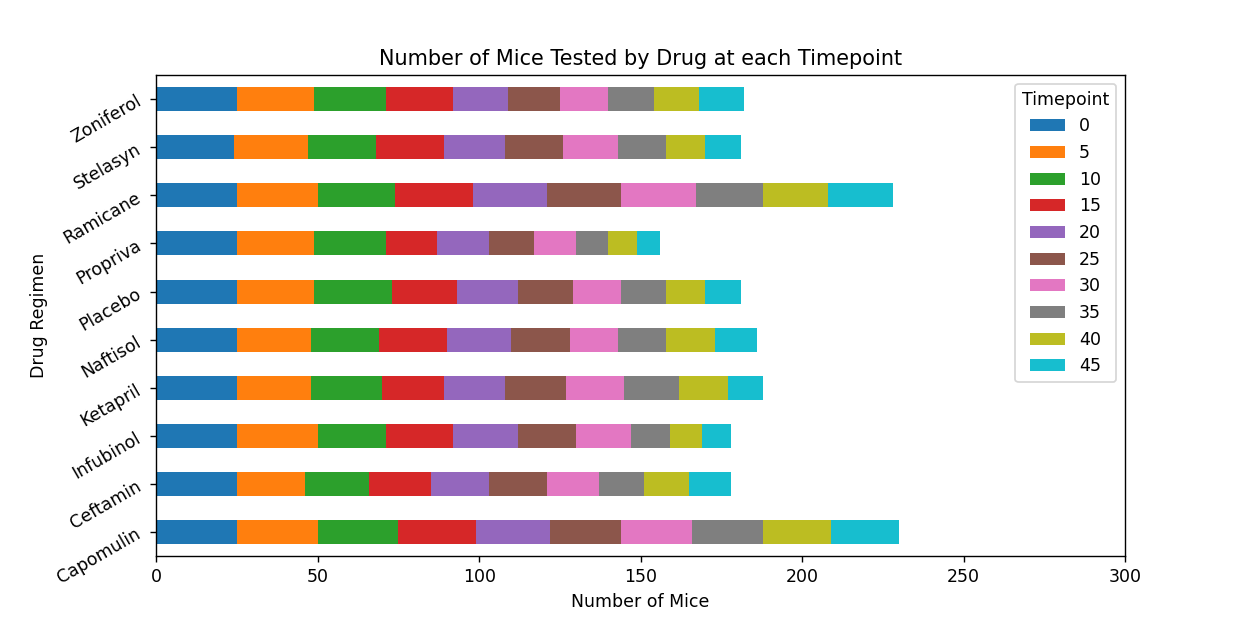

In [19]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
## 10 time points and 10 drug regimens

count_drug = mouse_data_clean.groupby(['Drug Regimen', 'Timepoint'])['Timepoint'].count().unstack('Timepoint').reset_index()

ax = count_drug.plot.barh(x = 'Drug Regimen', rot = 30, stacked = True, figsize = (10,5))
plt.title("Number of Mice Tested by Drug at each Timepoint")
plt.xlim(0,300)
plt.ylabel("Drug Regimen")
plt.xlabel("Number of Mice")
plt.show()

<IPython.core.display.Javascript object>


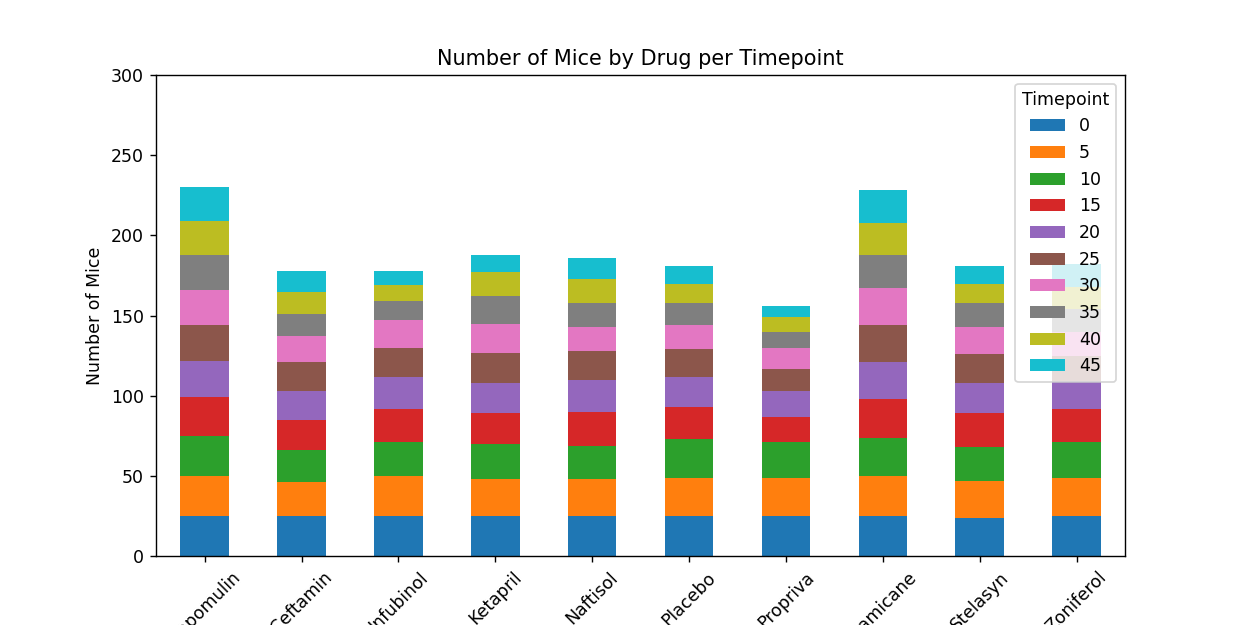

In [20]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
## plt.bar

ax = count_drug.plot(kind = 'bar',stacked = True, figsize = (10,5))
ax.set_xticklabels(count_drug['Drug Regimen'], rotation = 45)
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Number of Mice")
ax.set_ylim(0,300)
ax.set_title("Number of Mice by Drug per Timepoint")
ax.legend(title = 'Timepoint', loc = "upper right")
plt.show()

<IPython.core.display.Javascript object>


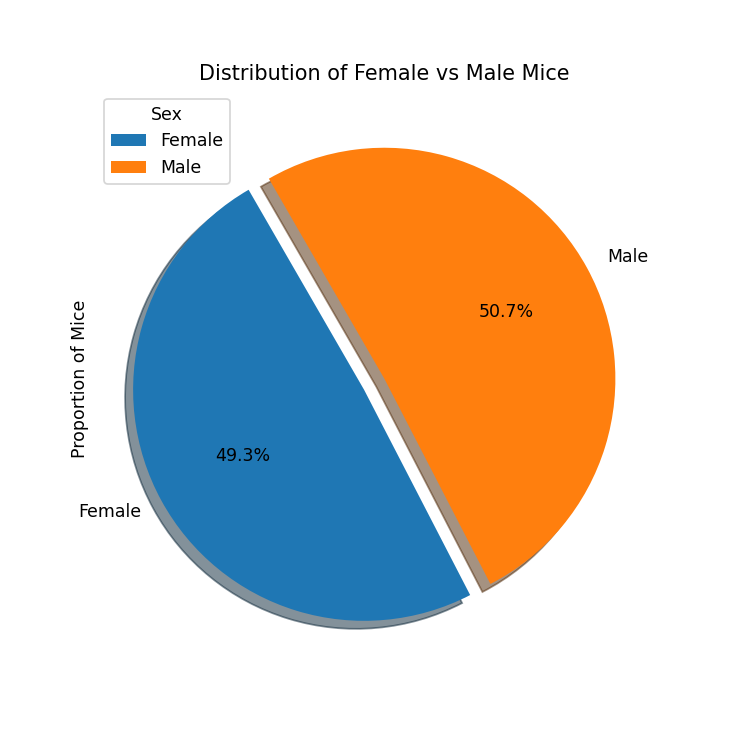

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

count_gender = mouse_data_clean.groupby(['Sex']).size().reset_index(name = 'Proportion of Mice')

label = count_gender['Sex']

explode1 = (0.1,0)

plot_pd = count_gender.plot.pie(y = 'Proportion of Mice', labels = label, figsize = (6,6),
                             autopct ="%1.1f%%", explode = explode1, shadow = True, startangle = 120)
plt.title("Distribution of Female vs Male Mice")
plt.legend(title ='Sex')
plt.show()

<IPython.core.display.Javascript object>


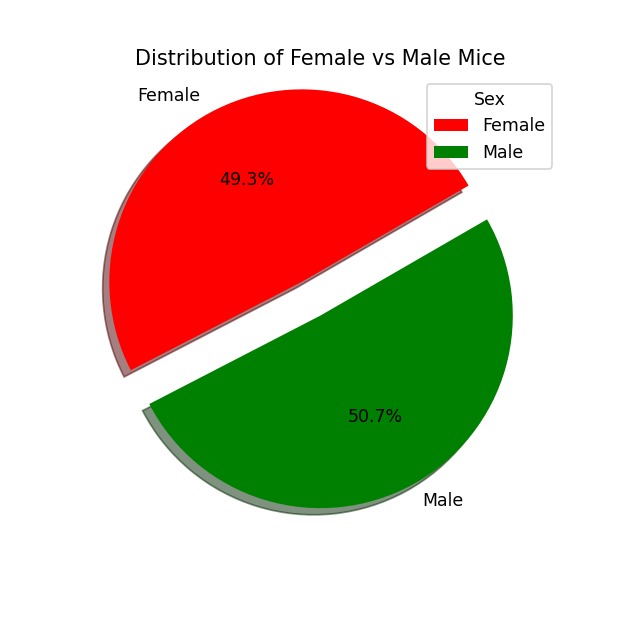

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

explode2 = (0.2,0)
colours2 = ("r","g")

fig4, ax1 = plt.subplots(figsize=(5,5))

ax1.pie(data = count_gender, x = "Proportion of Mice", explode = explode2, colors = colours2,
                labels = label, autopct = "%1.1f%%", shadow = True, startangle = 30)
ax1.set_title("Distribution of Female vs Male Mice")
ax1.legend(title = "Sex", loc = "best")
plt.show()

## Quartiles, Outliers and Boxplots

In [23]:
mouse_data_clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [24]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

df_lasttimepoint = mouse_data_clean.sort_values(['Timepoint'], ascending = False)

df_lasttimepoint = df_lasttimepoint.drop_duplicates(subset= 'Mouse ID', keep = 'first').reset_index(drop = True)

df_lasttimepoint

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,z969,Naftisol,Male,9,30,45,73.867845,4
1,f345,Infubinol,Male,23,26,45,60.918767,1
2,i635,Propriva,Male,21,26,45,58.633404,3
3,r554,Capomulin,Female,8,17,45,32.377357,3
4,h246,Ketapril,Male,13,30,45,74.104086,2
...,...,...,...,...,...,...,...,...
244,d133,Zoniferol,Male,5,30,0,45.000000,0
245,b447,Ceftamin,Male,2,30,0,45.000000,0
246,t573,Ceftamin,Female,15,27,0,45.000000,0
247,f932,Ketapril,Male,15,29,0,45.000000,0


In [25]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumour vol data (for plotting)
TuVol_data = []

    # Locate the rows which contain mice on each drug and get the tumour volumes
for i in treatment_list:
    df_subset_drug = df_lasttimepoint.loc[df_lasttimepoint['Drug Regimen'].isin(treatment_list)]

TuVol_data = df_subset_drug[['Drug Regimen','Tumour Volume (mm3)']]


#filter for specific drug and print quantiles

def quantiles(x):
    drug = TuVol_data.loc[TuVol_data['Drug Regimen'] == x]   

    drug = drug["Tumour Volume (mm3)"]

    #Determine outliers using upper and lower bounds

    quartiles = drug.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    print(f"The lower quartile of tumour volumes is: {lowerq}")
    print(f"The upper quartile of tumour volumes is: {upperq}")
    print(f"The interquartile range of tumour volumes is: {iqr}")
    print(f"The the median of tumour volumes is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")

In [26]:
#Interquartile range (IQR) and outliers for: Capomulin
quantiles('Capomulin')

The lower quartile of tumour volumes is: 32.37735684
The upper quartile of tumour volumes is: 40.1592203
The interquartile range of tumour volumes is: 7.781863460000004
The the median of tumour volumes is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [27]:
#Interquartile range (IQR) and outliers for: Ramicane
quantiles('Ramicane')

The lower quartile of tumour volumes is: 31.56046955
The upper quartile of tumour volumes is: 40.65900627
The interquartile range of tumour volumes is: 9.098536719999998
The the median of tumour volumes is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [28]:
#Interquartile range (IQR) and outliers for: Infubinol
quantiles('Infubinol')

The lower quartile of tumour volumes is: 54.04860769
The upper quartile of tumour volumes is: 65.52574285
The interquartile range of tumour volumes is: 11.477135160000003
The the median of tumour volumes is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [29]:
#Interquartile range (IQR) and outliers for: Ceftamin
quantiles('Ceftamin')

The lower quartile of tumour volumes is: 48.72207785
The upper quartile of tumour volumes is: 64.29983003
The interquartile range of tumour volumes is: 15.577752179999997
The the median of tumour volumes is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


<IPython.core.display.Javascript object>


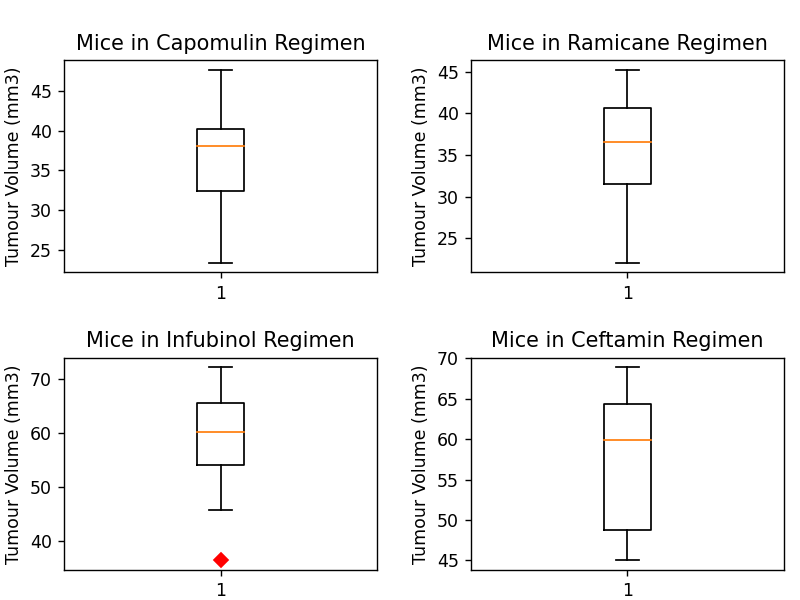

In [30]:
## Generate a box plot of the final tumour volume of each mouse across four regimens of interest

Capomulin_TuVol = TuVol_data.loc[TuVol_data['Drug Regimen'] == 'Capomulin']

Ramicane_TuVol = TuVol_data.loc[TuVol_data['Drug Regimen'] == 'Ramicane']

Infubinol_TuVol = TuVol_data.loc[TuVol_data['Drug Regimen'] == 'Infubinol']

Ceftamin_TuVol = TuVol_data.loc[TuVol_data['Drug Regimen'] == 'Ceftamin']


fig, axs = plt.subplots(2,2)

axs[0,0].boxplot([Capomulin_TuVol['Tumour Volume (mm3)']], 0, 'rD')
axs[0,0].set_title('Mice in Capomulin Regimen')
axs[0,0].set_ylabel('Tumour Volume (mm3)')

axs[0,1].boxplot([Ramicane_TuVol['Tumour Volume (mm3)']], 0, 'rD')
axs[0,1].set_title('Mice in Ramicane Regimen')
axs[0,1].set_ylabel('Tumour Volume (mm3)')

axs[1,0].boxplot([Infubinol_TuVol['Tumour Volume (mm3)']],0,'rD')
axs[1,0].set_title('Mice in Infubinol Regimen')
axs[1,0].set_ylabel('Tumour Volume (mm3)')

axs[1,1].boxplot([Ceftamin_TuVol['Tumour Volume (mm3)']],0,'rD')
axs[1,1].set_title('Mice in Ceftamin Regimen')
axs[1,1].set_ylabel('Tumour Volume (mm3)')


fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)

plt.show()

## Line and Scatter Plots

In [31]:
mouse_data_clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [32]:
# Select the lucky mouse
capomulin_mice = pd.DataFrame(mouse_data_clean.loc[(mouse_data_clean["Drug Regimen"] == "Capomulin")])
capomulin_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [33]:
capomulin_mouse_s185 = pd.DataFrame(capomulin_mice.loc[(capomulin_mice["Mouse ID"] == "s185")])
capomulin_mouse_s185

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


<IPython.core.display.Javascript object>


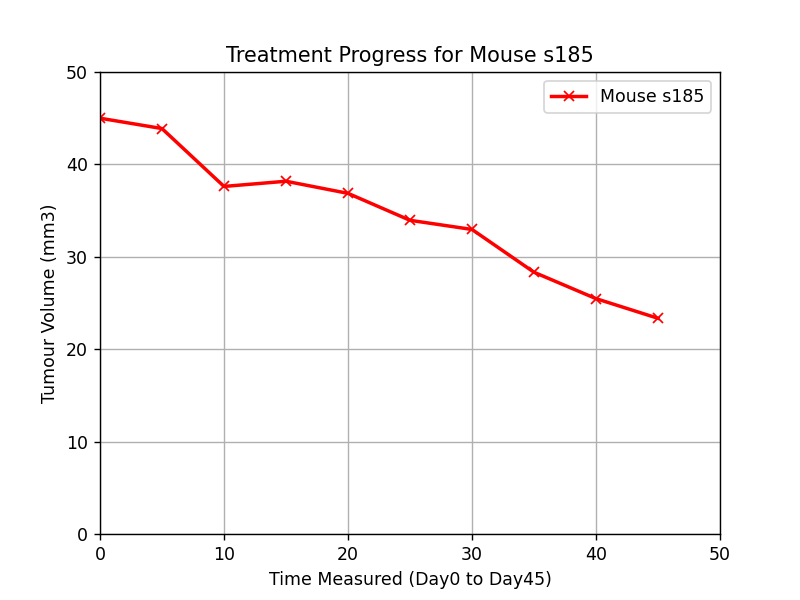

In [34]:
# Generate a line plot of tumour volume vs. time point for a mouse treated with Capomulin


capomulin_mouse_s185.plot.line(x = "Timepoint",y = "Tumour Volume (mm3)",
                               marker = 'x', color = 'red', linewidth = 2,
                               label = "Mouse s185", title = "Treatment Progress for Mouse s185")
plt.legend(loc = "best")
plt.xlabel("Time Measured (Day0 to Day45)")
plt.ylabel("Tumour Volume (mm3)")
plt.xlim(0,50)
plt.ylim(0,50)
plt.grid()
plt.show()

In [35]:
# Check how many unique mice in capomulin treatment group
unique_capomulin_mice = capomulin_mice['Mouse ID'].nunique()
unique_capomulin_mice

25

In [36]:
### Dataframe containing Average Tumour Volume vs Mouse Weight

ByID_TuVol_capomulin = capomulin_mice.groupby(['Mouse ID']).mean()
ByID_TuVol_capomulin

,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.70
b742,7.0,21.0,22.5,40.083699,0.00
f966,16.0,17.0,10.0,36.505973,0.00
g288,3.0,19.0,22.5,41.990097,0.80
g316,22.0,22.0,22.5,44.613344,1.00
i557,1.0,24.0,22.5,44.805810,0.20
i738,23.0,20.0,22.5,39.141053,0.60
j119,7.0,23.0,22.5,44.465236,0.60
j246,21.0,21.0,17.5,43.216925,0.25


<IPython.core.display.Javascript object>


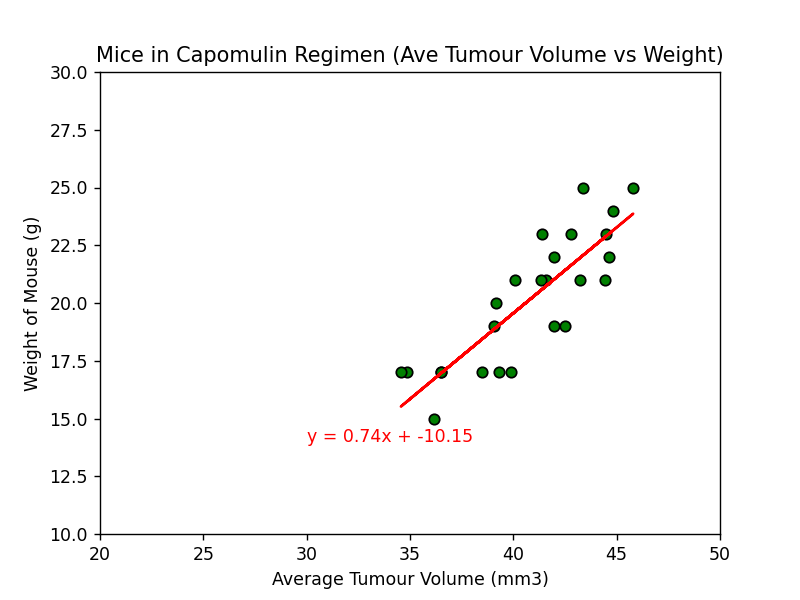

In [37]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen
## capomulin_mice

weight_ByID_TuVol_capomulin = ByID_TuVol_capomulin['Weight (g)']
ByID_capomulin_tumour = ByID_TuVol_capomulin['Tumour Volume (mm3)']

fig, ax1 = plt.subplots()

ax1.scatter(ByID_capomulin_tumour, weight_ByID_TuVol_capomulin, marker = 'o',
            facecolors = "green", edgecolors = "black")
ax1.set_xlabel("Average Tumour Volume (mm3)")
ax1.set_xlim(20,50)
ax1.set_ylabel("Weight of Mouse (g)")
ax1.set_ylim(10,30)
ax1.set_title("Mice in Capomulin Regimen (Ave Tumour Volume vs Weight)")
plt.show()

## Correlation and Regression

In [38]:
# Calculate the correlation coefficient for mouse weight and average tumour volume for the Capomulin regimen

print(f"The correlation coefficient between mouse weight and average tumour volume is {round(st.pearsonr(ByID_capomulin_tumour, weight_ByID_TuVol_capomulin)[0],2)}.")

The correlation coefficient between mouse weight and average tumour volume is 0.84.


In [39]:
# Calculate the linear regression model for mouse weight and average tumour volume for the Capomulin regimen
# Plotting linear model for average tumour volume versus mouse weight on previous scatterplot. See Figure 6.

(w_slope, w_int, w_r, w_p, w_std_err) = st.linregress(ByID_capomulin_tumour,weight_ByID_TuVol_capomulin)

w_fit = w_slope * ByID_capomulin_tumour + w_int

line_eq = "y = " + str(round(w_slope,2)) + "x + " + str(round(w_int,2))

plt.plot(ByID_capomulin_tumour,w_fit,"r-")
ax1.text(30,14, line_eq,fontsize = 10, color = "red")
print(f"The r-squared is: {w_r**2:.6f}.")

plt.show()

The r-squared is: 0.708857.
